In [9]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import precision_score,classification_report,accuracy_score
from sklearn.naive_bayes import GaussianNB
## set training data
train = pd.read_csv("AdultTraining5.csv")
y_train = train['income']
y_train = y_train.replace("<=50K",0,regex=True)
y_train = y_train.replace(">50K",1,regex=True)
X_train = train.drop('income',axis = 1)
## ori test
ori_test = pd.read_csv('AdultOriginalTesting5.csv')
y_ori = ori_test['income']
y_ori = y_ori.replace("<=50K",0,regex=True)
y_ori = y_ori.replace(">50K",1,regex=True)
X_ori = ori_test.drop('income',axis = 1)
## new test
new_test = pd.read_csv('AdultNewTesting5.csv')
y_new = new_test['income']
y_new = y_new.replace("<=50K",0,regex=True)
y_new = y_new.replace(">50K",1,regex=True)
X_new = new_test.drop('income',axis = 1)

In [10]:
### Lglbfgs
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_ori_pred = LG.predict(X_ori)
y_ori_precision1 = precision_score(y_ori,y_ori_pred,average = 'binary')
y_ori_accuracy1 = accuracy_score(y_ori,y_ori_pred)

y_new_pred = LG.predict(X_new)
y_new_precision1 = precision_score(y_new,y_new_pred,average = 'binary')
y_new_accuracy1 = accuracy_score(y_new,y_new_pred)
print("LG lbfgs\n precision for ori:",y_ori_precision1,"\n",
      "\n precision for new:",y_new_precision1)

LG lbfgs
 precision for ori: 0.6150943396226415 
 
 precision for new: 0.5705128205128205


In [11]:
### LgNT
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(solver='newton-cg').fit(X_train, y_train)
y_ori_pred = LG.predict(X_ori)
y_ori_precision2 = precision_score(y_ori,y_ori_pred,average = 'binary')
y_ori_accuracy2 = accuracy_score(y_ori,y_ori_pred)

y_new_pred = LG.predict(X_new)
y_new_precision2 = precision_score(y_new,y_new_pred,average = 'binary')
y_new_accuracy2 = accuracy_score(y_new,y_new_pred)
print("LG NT \n precision for ori:",y_ori_precision2,"\n",
      "\n precision for new:",y_new_precision2)

LG NT 
 precision for ori: 0.6150943396226415 
 
 precision for new: 0.5705128205128205


In [12]:
### Lgsag
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(solver='sag').fit(X_train, y_train)
y_ori_pred = LG.predict(X_ori)
y_ori_precision3 = precision_score(y_ori,y_ori_pred,average = 'binary')
y_ori_accuracy3 = accuracy_score(y_ori,y_ori_pred)

y_new_pred = LG.predict(X_new)
y_new_precision3 = precision_score(y_new,y_new_pred,average = 'binary')
y_new_accuracy3 = accuracy_score(y_new,y_new_pred)
print("LG sag \n precision for ori:",y_ori_precision3,"\n",
      "\n precision for new:",y_new_precision3)

LG sag 
 precision for ori: 0.615866388308977 
 
 precision for new: 0.5738095238095238


/Users/ning/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [13]:
### Lgsaga
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(solver='saga').fit(X_train, y_train)
y_ori_pred = LG.predict(X_ori)
y_ori_precision4 = precision_score(y_ori,y_ori_pred,average = 'binary')
y_ori_accuracy4 = accuracy_score(y_ori,y_ori_pred)

y_new_pred = LG.predict(X_new)
y_new_precision4 = precision_score(y_new,y_new_pred,average = 'binary')
y_new_accuracy4 = accuracy_score(y_new,y_new_pred)
print("LG saga \n precision for ori:",y_ori_precision4,"\n",
      "\n precision for new:",y_new_precision4)

LG saga 
 precision for ori: 0.6332378223495702 
 
 precision for new: 0.6052631578947368


/Users/ning/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [14]:
print("LG lbfgs\n precision for ori:",y_ori_precision1,"\n",
      "\n precision for new:",y_new_precision1)
print("LG NT \n precision for ori:",y_ori_precision2,"\n",
      "\n precision for new:",y_new_precision2)
print("LG sag \n precision for ori:",y_ori_precision3,"\n",
      "\n precision for new:",y_new_precision3)
print("LG saga \n precision for ori:",y_ori_precision4,"\n",
      "\n precision for new:",y_new_precision4)

LG lbfgs
 precision for ori: 0.6150943396226415 
 
 precision for new: 0.5705128205128205
LG NT 
 precision for ori: 0.6150943396226415 
 
 precision for new: 0.5705128205128205
LG sag 
 precision for ori: 0.615866388308977 
 
 precision for new: 0.5738095238095238
LG saga 
 precision for ori: 0.6332378223495702 
 
 precision for new: 0.6052631578947368


/Users/ning/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ning/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


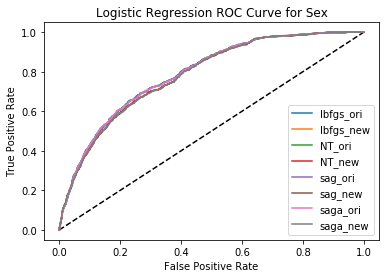

In [17]:
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt

LG = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_pred_prob_ori = LG.predict_proba(X_ori)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_ori, y_pred_prob_ori)
y_pred_prob_new = LG.predict_proba(X_new)[:,1]
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_new, y_pred_prob_new)

LG = LogisticRegression(solver='newton-cg').fit(X_train, y_train)
y_pred_prob_ori = LG.predict_proba(X_ori)[:,1]
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_ori, y_pred_prob_ori)
y_pred_prob_new = LG.predict_proba(X_new)[:,1]
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_new, y_pred_prob_new)

LG = LogisticRegression(solver='sag').fit(X_train, y_train)
y_pred_prob_ori = LG.predict_proba(X_ori)[:,1]
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_ori, y_pred_prob_ori)
y_pred_prob_new = LG.predict_proba(X_new)[:,1]
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_new, y_pred_prob_new)

LG = LogisticRegression(solver='saga').fit(X_train, y_train)
y_pred_prob_ori = LG.predict_proba(X_ori)[:,1]
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_ori, y_pred_prob_ori)
y_pred_prob_new = LG.predict_proba(X_new)[:,1]
fpr8, tpr8, thresholds8 = metrics.roc_curve(y_new, y_pred_prob_new)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1,tpr1,label = 'lbfgs_ori')
plt.plot(fpr2,tpr2,label = 'lbfgs_new')
plt.plot(fpr3,tpr3,label = 'NT_ori')
plt.plot(fpr4,tpr4,label = 'NT_new')
plt.plot(fpr5,tpr5,label = 'sag_ori')
plt.plot(fpr6,tpr6,label = 'sag_new')
plt.plot(fpr7,tpr7,label = 'saga_ori')
plt.plot(fpr8,tpr8,label = 'saga_new')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve for Sex')
plt.legend()
plt.show()

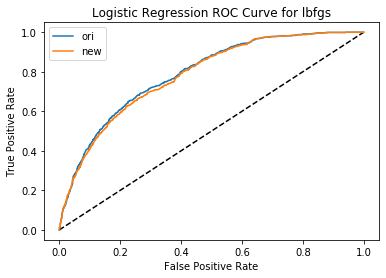

In [16]:
LG = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

y_pred_prob_ori = LG.predict_proba(X_ori)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_ori, y_pred_prob_ori)

y_pred_prob_new = LG.predict_proba(X_new)[:,1]
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_new, y_pred_prob_new)


plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1,tpr1,label = 'ori')
plt.plot(fpr2,tpr2,label = 'new')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve for lbfgs')
plt.legend()
plt.show()